<a href="https://colab.research.google.com/github/ramesitexp/DataScience_Zone/blob/main/cnn_image_identitification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [2]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

In [5]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation = 'relu', input_shape =(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train, epochs = 3)

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.8571 - loss: 3.2112
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9677 - loss: 0.1128
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9760 - loss: 0.0802


In [7]:
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9669 - loss: 0.1218


[0.11024612933397293, 0.9699000120162964]

In [8]:
import matplotlib.pyplot as plt


In [9]:
import numpy as np

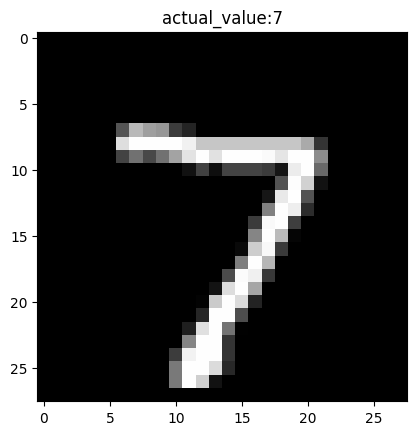

In [10]:
plt.imshow(x_test[0].reshape(28,28),cmap = 'gray')
plt.title("actual_value:"+str(y_test[0]))
plt.show()

In [11]:
pred=model.predict(np.expand_dims(x_test[0], axis=(0, -1)))
print("predicted_value:",np.argmax(pred))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
predicted_value: 7


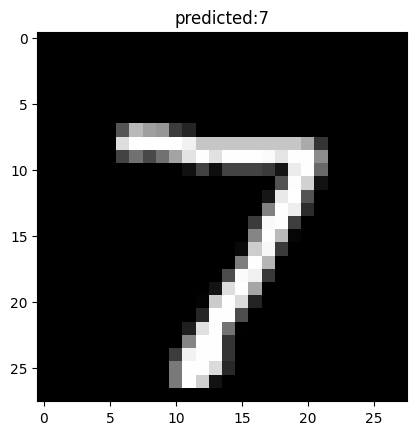

In [12]:
plt.imshow(x_test[0].reshape(28,28),cmap = 'gray')
plt.title("predicted:"+str(np.argmax(pred)))
plt.show()